In [1]:
#PDR Spatial Analysis

In [2]:
#Attempting to map combined parcel and zoning data from first worksheet

In [74]:
import pandas as pd
import requests
import geopandas as gpd
import matplotlib.pyplot as plt

In [21]:
parceldata = gpd.read_file('filteredpdr4.csv')

In [3]:
#Seeing whether the csv file is being read correctly

In [22]:
type(parceldata)

geopandas.geodataframe.GeoDataFrame

In [23]:
parceldata.head()

,field_1,Unnamed: 0,objectid,blklot,bldgsf,totuses,landuse,pdr,parcelarea,zoning_code,active,geometry,zoning_x,parcelno2,zoning_y,buildingsf,landarea,landvalue,finzone2,geometry
0,14738,14738,14710,4793001B,5500,0,PDR,0,5484.87963388,PDR-2,True,MULTIPOLYGON (((-122.38172846694592 37.7254965...,PDR-2,4793001B,M1,5500.0,5500.0,905415.0,PDR-2,MULTIPOLYGON (((-122.38172846694592 37.7254965...
1,14739,14739,14711,4357004,4873,13365,MIXED,6003,13603.9931126,PDR-2,True,MULTIPOLYGON (((-122.38574307007826 37.7502624...,PDR-2,4357004,M2,11300.0,12000.0,2927400.0,PDR-2,MULTIPOLYGON (((-122.38574307007826 37.7502624...
2,69874,69874,69851,3552009,0,0,RETAIL/ENT,0,18324.895471400006,PDR-1-G,True,MULTIPOLYGON (((-122.41552495288843 37.7660867...,PDR-1-G,3552009,M1,0.0,18375.0,700157.0,PDR-1-G,MULTIPOLYGON (((-122.41552495288843 37.7660867...
3,69876,69876,69853,3552013,0,5000,PDR,0,13212.4986738,PDR-1-G,True,MULTIPOLYGON (((-122.41651291865504 37.7653523...,PDR-1-G,3552013,PDR1G,0.0,13198.0,155228.0,PDR-1-G,MULTIPOLYGON (((-122.41651291865504 37.7653523...
4,69933,69933,69911,3551003,23522,8020,MIXED,3272,17571.244674200007,PDR-1-G,True,MULTIPOLYGON (((-122.41328098872894 37.7655474...,PDR-1-G,3551003,M1,23522.0,17458.0,1062960.0,PDR-1-G,MULTIPOLYGON (((-122.41328098872894 37.7655474...


In [6]:
type(parceldata.geometry)

geopandas.geoseries.GeoSeries

In [7]:
#Fixing glitch where geometry column is repeated

In [24]:
parceldatanew = gpd.read_file("filteredpdr4.csv", GEOM_POSSIBLE_NAMES="geometry", KEEP_GEOM_COLUMNS="NO")

In [25]:
parceldatanew.head()

,field_1,Unnamed: 0,objectid,blklot,bldgsf,totuses,landuse,pdr,parcelarea,zoning_code,active,zoning_x,parcelno2,zoning_y,buildingsf,landarea,landvalue,finzone2,geometry
0,14738,14738,14710,4793001B,5500,0,PDR,0,5484.87963388,PDR-2,True,PDR-2,4793001B,M1,5500.0,5500.0,905415.0,PDR-2,(POLYGON ((-122.3817284669459 37.7254965541782...
1,14739,14739,14711,4357004,4873,13365,MIXED,6003,13603.9931126,PDR-2,True,PDR-2,4357004,M2,11300.0,12000.0,2927400.0,PDR-2,(POLYGON ((-122.3857430700783 37.7502624526935...
2,69874,69874,69851,3552009,0,0,RETAIL/ENT,0,18324.895471400006,PDR-1-G,True,PDR-1-G,3552009,M1,0.0,18375.0,700157.0,PDR-1-G,(POLYGON ((-122.4155249528884 37.7660867626118...
3,69876,69876,69853,3552013,0,5000,PDR,0,13212.4986738,PDR-1-G,True,PDR-1-G,3552013,PDR1G,0.0,13198.0,155228.0,PDR-1-G,(POLYGON ((-122.416512918655 37.76535232313464...
4,69933,69933,69911,3551003,23522,8020,MIXED,3272,17571.244674200007,PDR-1-G,True,PDR-1-G,3551003,M1,23522.0,17458.0,1062960.0,PDR-1-G,(POLYGON ((-122.4132809887289 37.7655474018695...


In [10]:
parceldatanew.sample(n=30)

,field_1,Unnamed: 0,objectid,blklot,bldgsf,totuses,landuse,pdr,parcelarea,zoning_code,active,zoning_x,parcelno2,zoning_y,buildingsf,landarea,landvalue,finzone2,geometry
936,96254,96254,96247,4318012,22572,0,PDR,0,5717.65223104,PDR-1-G,True,PDR-1-G,4318012,M2,22572.0,5671.0,31825.0,PDR-1-G,(POLYGON ((-122.3906484096183 37.7508350851518...
867,95356,95356,95344,4830020,0,0,VACANT,0,2008.76507723,PDR-2,True,PDR-2,4830020,PDR1B,0.0,2025.0,128441.0,PDR-2,(POLYGON ((-122.3896073145015 37.7261520510796...
171,85007,85007,84993,3530045,0,0,VACANT,0,474.604502842,PDR-1-G,True,PDR-1-G,3530045,CM,0.0,574.0,58857.0,PDR-1-G,(POLYGON ((-122.417388097543 37.76952201928879...
189,85304,85304,85290,3924008,0,12757,VACANT,3271,116135.331747,PDR-1-G,True,PDR-1-G,3924008,,0.0,0.0,8613009.0,PDR-1-G,"(POLYGON ((-122.41167536378 37.76643404830667,..."
545,90847,90847,90843,5597A005,5915,0,PDR,0,4874.65640483,PDR-2,True,PDR-2,,,,,,PDR-2,(POLYGON ((-122.4016710430202 37.7414829403110...
1382,147769,147769,147767,4570026,64903,49384,MIXED,5400,167932.565015,PDR-2,True,PDR-2,4570026,M2,64903.0,0.0,4502700.0,PDR-2,(POLYGON ((-122.3825476305281 37.7418510474322...
708,93207,93207,93198,3915004,0,38796,RETAIL/ENT,33630,19852.5074291,PDR-1-D,True,PDR-1-D,3915004,M2,0.0,20000.0,7064986.0,PDR-1-D,(POLYGON ((-122.4029537342379 37.7674570417139...
1090,103844,103844,103822,4328A005,47328,0,PDR,0,60074.0812796,PDR-2,True,PDR-2,,,,,,PDR-2,(POLYGON ((-122.4006949594527 37.7495827227656...
1188,104828,104828,104811,5226026,4975,14063,PDR,14063,4975.05665724,PDR-2,True,PDR-2,5226026,M2,4975.0,5000.0,540466.0,PDR-2,(POLYGON ((-122.3884028199705 37.7434232824509...
1241,108955,108955,108938,5560095,4800,4073,PDR,4073,5138.72321397,PDR-2,True,PDR-2,5560095,M1,4800.0,4874.0,750363.0,PDR-2,(POLYGON ((-122.4037074389095 37.7435128702195...


In [11]:
parceldatanew.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1448 entries, 0 to 1447
Data columns (total 19 columns):
field_1        1448 non-null object
Unnamed: 0     1448 non-null object
objectid       1448 non-null object
blklot         1448 non-null object
bldgsf         1448 non-null object
totuses        1448 non-null object
landuse        1448 non-null object
pdr            1448 non-null object
parcelarea     1448 non-null object
zoning_code    1448 non-null object
active         1448 non-null object
zoning_x       1448 non-null object
parcelno2      1448 non-null object
zoning_y       1448 non-null object
buildingsf     1448 non-null object
landarea       1448 non-null object
landvalue      1448 non-null object
finzone2       1448 non-null object
geometry       1448 non-null object
dtypes: object(19)
memory usage: 215.0+ KB


In [12]:
#Testing whether I can map the parcel data

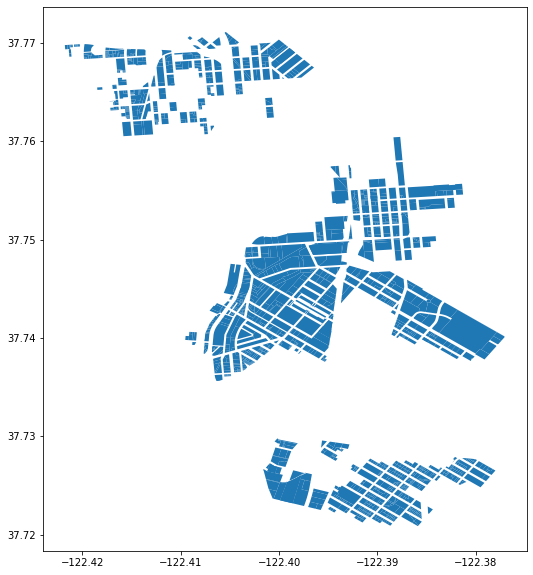

In [13]:
#All PDR zoned parcels in SF

parceldatanew.plot(figsize=(20,10))

plt.show()

In [75]:
%%capture
!pip install geoplot;

In [76]:
import geoplot

In [77]:
geoplot.polyplot(parceldatanew)

plt.show()

AttributeError: 'int' object has no attribute 'bounds'

<Figure size 576x432 with 0 Axes>

In [78]:
#Looking at my filtered data more closely, a lot of the numerical data is not registering properly
parceldatanew.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1448 entries, 0 to 1447
Data columns (total 20 columns):
field_1        1448 non-null object
Unnamed: 0     1448 non-null object
objectid       1448 non-null object
blklot         1448 non-null object
bldgsf         1448 non-null object
totuses        1448 non-null object
landuse        1448 non-null object
pdr            1448 non-null object
parcelarea     1448 non-null object
zoning_code    1448 non-null object
active         1448 non-null object
zoning_x       1448 non-null object
parcelno2      1448 non-null object
zoning_y       1448 non-null object
buildingsf     1448 non-null int64
landarea       1448 non-null object
landvalue      1448 non-null object
finzone2       1448 non-null object
geometry       1448 non-null object
buildingsf2    1448 non-null float64
dtypes: float64(1), int64(1), object(18)
memory usage: 226.3+ KB


In [50]:
parceldatanew["buildingsf"] = pd.to_numeric(parceldatanew["buildingsf"], downcast="float")

In [53]:
parceldatanew.loc[parceldatanew['buildingsf'].isnull()] = -1 

In [67]:
#Converting building square feet to integers
parceldatanew['buildingsf2'] = parceldatanew['buildingsf'].astype(float)

In [81]:
parceldatanew.sample(n=30)

,field_1,Unnamed: 0,objectid,blklot,bldgsf,totuses,landuse,pdr,parcelarea,zoning_code,active,zoning_x,parcelno2,zoning_y,buildingsf,landarea,landvalue,finzone2,geometry,buildingsf2
643,92300,92300,92295,5348010,0,0,VACANT,0,9958.43541042,PDR-2,True,PDR-2,5348010,M1,0,9992.0,1330867.0,PDR-2,(POLYGON ((-122.4021190601258 37.7383130978172...,0.0
268,87253,87253,87251,5375059,31712,1438,RETAIL/ENT,0,44503.3242334,PDR-2,True,PDR-2,5375059,M1,31712,45023.0,3396498.0,PDR-2,(POLYGON ((-122.4061031552111 37.7356425184073...,31712.0
1130,104368,104368,104351,5239024,31120,56592,MIPS,8851,34925.9745582,PDR-1-B,True,PDR-1-B,5239024,M1,31120,35000.0,1350803.0,PDR-1-B,(POLYGON ((-122.3824189777824 37.7384763619718...,31120.0
515,90581,90581,90578,5333009,1470,0,RESIDENT,0,2678.87006094,PDR-2,True,PDR-2,5333009,M1,1470,2696.0,333658.0,PDR-2,(POLYGON ((-122.4016673329941 37.7386644244373...,1470.0
315,87731,87731,87732,4883029,5598,0,PDR,0,5973.32858028,PDR-2,True,PDR-2,4883029,M1,5598,6000.0,37250.0,PDR-2,(POLYGON ((-122.3887149329003 37.7218639413801...,5598.0
1110,104028,104028,104011,4850026,13125,25000,PDR,25000,14717.5797865,PDR-2,True,PDR-2,4850026,M1,13125,15000.0,341871.0,PDR-2,(POLYGON ((-122.3886670370531 37.7240618925679...,13125.0
905,95976,95976,95970,4792001,2500,7959,MIXED,5775,2479.19900064,PDR-1-B,True,PDR-1-B,4792001,RH2,2500,2500.0,28102.0,PDR-1-B,(POLYGON ((-122.3834186250694 37.7267596915577...,2500.0
1215,108434,108434,108415,5584001,67449,59376,PDR,52355,81545.8356791,PDR-2,True,PDR-2,5584001,M1,67449,83273.0,2030499.0,PDR-2,(POLYGON ((-122.4028096284292 37.7402720182288...,67449.0
821,94739,94739,94728,3902002,0,0,MISSING DATA,0,7951.98825548,PDR-1-G,True,PDR-1-G,3902002,M1,0,7374.0,393132.0,PDR-1-G,(POLYGON ((-122.4118472072151 37.7681967768918...,0.0
94,82011,82011,81995,3529020,1915,0,RETAIL/ENT,0,2868.56199917,PDR-1-G,True,PDR-1-G,3529020,PDR1G,1915,2940.0,214702.0,PDR-1-G,(POLYGON ((-122.4150514335784 37.7686596962348...,1915.0


In [82]:
cleandata = parceldatanew.loc[parceldatanew.geometry != -1]

In [87]:
cleandata.sample(n=30)

,field_1,Unnamed: 0,objectid,blklot,bldgsf,totuses,landuse,pdr,parcelarea,zoning_code,active,zoning_x,parcelno2,zoning_y,buildingsf,landarea,landvalue,finzone2,geometry,buildingsf2
1427,152568,152568,152572,3958006,29174,22376,MIXED,14383,27152.7764193,PDR-1-D,True,PDR-1-D,3958006,M1,29174,29500.0,3244641.0,PDR-1-D,(POLYGON ((-122.4040843190252 37.7654015492500...,29174.0
307,87685,87685,87686,4832008,0,0,PDR,0,2981.66790406,PDR-2,True,PDR-2,4832008,M1,0,3000.0,137406.0,PDR-2,(POLYGON ((-122.3875006125171 37.7248223839292...,0.0
181,85024,85024,85010,3980009,0,0,VACANT,0,32407.2260379,PDR-1-G,True,PDR-1-G,3980009,PDR1G,0,32224.0,4415625.0,PDR-1-G,(POLYGON ((-122.4007309125672 37.7644461627368...,0.0
1387,147967,147967,147965,5596043,4174,4006,RETAIL/ENT,0,12621.370041,PDR-2,True,PDR-2,5596043,M1,4174,12662.0,686361.0,PDR-2,(POLYGON ((-122.4055417401491 37.7429838396828...,4174.0
24,70941,70941,70920,3550021,17610,0,PDR,0,38444.9809134,PDR-1-G,True,PDR-1-G,3550021,M1,17610,32042.0,578835.0,PDR-1-G,(POLYGON ((-122.4144253666889 37.7683472381795...,17610.0
96,82171,82171,82155,3572023,26320,8117,MIXED,5149,11838.0282616,PDR-1-G,True,PDR-1-G,3572023,M1,26320,12898.0,701670.0,PDR-1-G,(POLYGON ((-122.4134140826697 37.7640636187301...,26320.0
35,78846,78846,78828,3571006,7800,4529,MIXRES,1759,3351.24930338,PDR-1-G,True,PDR-1-G,3571006,CM,7800,3375.0,412745.0,PDR-1-G,(POLYGON ((-122.4167495573205 37.7636847350176...,7800.0
944,96353,96353,96346,4224090,0,0,VACANT,0,1227.88934367,PDR-1-G,True,PDR-1-G,4224090,PDR1G,0,1170.0,127284.0,PDR-1-G,(POLYGON ((-122.393033706888 37.75505014149358...,0.0
480,89983,89983,89982,5596052,0,0,VACANT,0,1619.34193068,PDR-2,True,PDR-2,5596052,M1,0,0.0,13708.0,PDR-2,"(POLYGON ((-122.40594030953 37.74259473845309,...",0.0
821,94739,94739,94728,3902002,0,0,MISSING DATA,0,7951.98825548,PDR-1-G,True,PDR-1-G,3902002,M1,0,7374.0,393132.0,PDR-1-G,(POLYGON ((-122.4118472072151 37.7681967768918...,0.0


In [59]:
parceldatanew.head()

,field_1,Unnamed: 0,objectid,blklot,bldgsf,totuses,landuse,pdr,parcelarea,zoning_code,active,zoning_x,parcelno2,zoning_y,buildingsf,landarea,landvalue,finzone2,geometry,buildingsf2
0,14738,14738,14710,4793001B,5500,0,PDR,0,5484.87963388,PDR-2,True,PDR-2,4793001B,M1,5500,5500.0,905415.0,PDR-2,(POLYGON ((-122.3817284669459 37.7254965541782...,5500
1,14739,14739,14711,4357004,4873,13365,MIXED,6003,13603.9931126,PDR-2,True,PDR-2,4357004,M2,11300,12000.0,2927400.0,PDR-2,(POLYGON ((-122.3857430700783 37.7502624526935...,11300
2,69874,69874,69851,3552009,0,0,RETAIL/ENT,0,18324.895471400006,PDR-1-G,True,PDR-1-G,3552009,M1,0,18375.0,700157.0,PDR-1-G,(POLYGON ((-122.4155249528884 37.7660867626118...,0
3,69876,69876,69853,3552013,0,5000,PDR,0,13212.4986738,PDR-1-G,True,PDR-1-G,3552013,PDR1G,0,13198.0,155228.0,PDR-1-G,(POLYGON ((-122.416512918655 37.76535232313464...,0
4,69933,69933,69911,3551003,23522,8020,MIXED,3272,17571.244674200007,PDR-1-G,True,PDR-1-G,3551003,M1,23522,17458.0,1062960.0,PDR-1-G,(POLYGON ((-122.4132809887289 37.7655474018695...,23522


In [65]:
parceldatanew.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1448 entries, 0 to 1447
Data columns (total 20 columns):
field_1        1448 non-null object
Unnamed: 0     1448 non-null object
objectid       1448 non-null object
blklot         1448 non-null object
bldgsf         1448 non-null object
totuses        1448 non-null object
landuse        1448 non-null object
pdr            1448 non-null object
parcelarea     1448 non-null object
zoning_code    1448 non-null object
active         1448 non-null object
zoning_x       1448 non-null object
parcelno2      1448 non-null object
zoning_y       1448 non-null object
buildingsf     1448 non-null int64
landarea       1448 non-null object
landvalue      1448 non-null object
finzone2       1448 non-null object
geometry       1448 non-null object
buildingsf2    1448 non-null int64
dtypes: int64(2), object(18)
memory usage: 226.3+ KB


In [66]:
type(parceldatanew.geometry[0])

shapely.geometry.multipolygon.MultiPolygon

In [79]:
type(parceldatanew.buildingsf[0])

numpy.int64

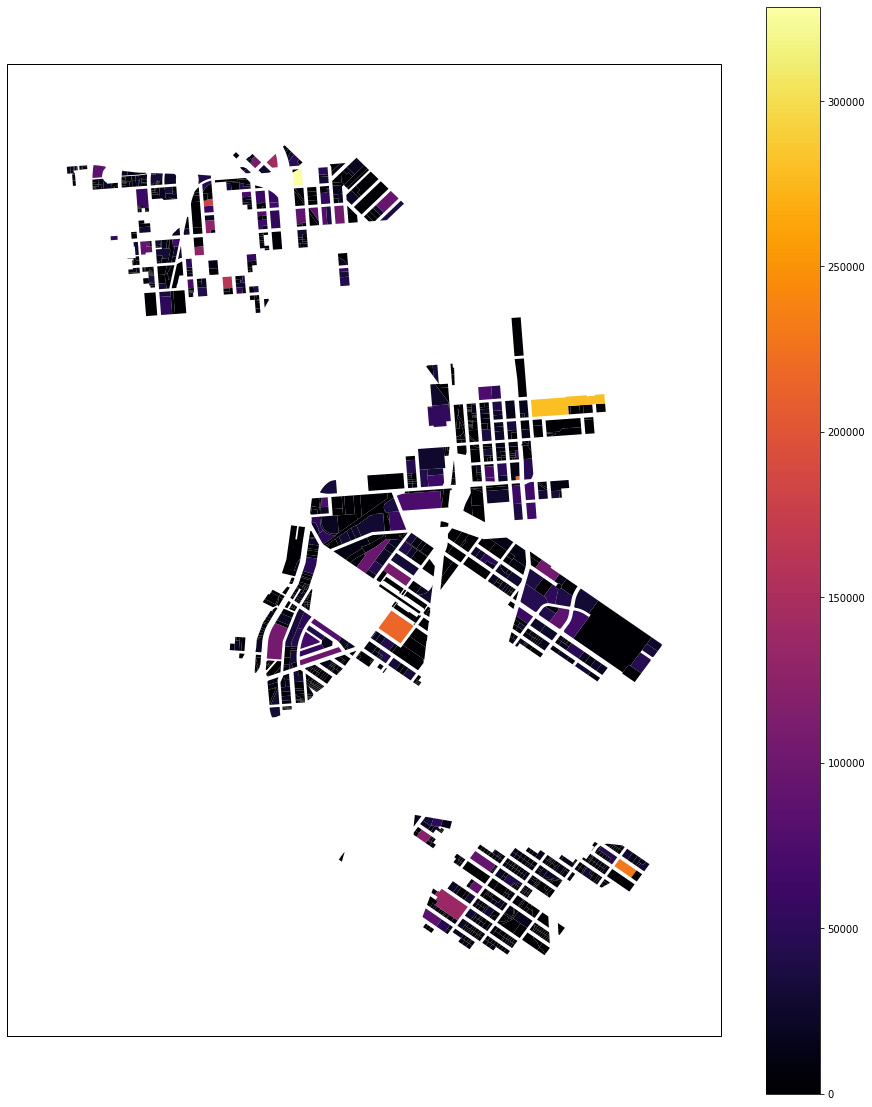

In [88]:
# Mapping building square feet with a choropleth. It looks like a lot of buidlings in PDR districts are below 50,000sf
# I can tell this data isn't up-to-date or has missing data because there are a few new and older PDR buildings that are over 50,000sf not shown in color

ax = geoplot.choropleth(cleandata, hue='buildingsf2', legend=True, cmap='inferno', figsize=(16, 20), projection=geoplot.crs.Robinson())

ax.outline_patch.set_visible(True)  
plt.show()